In [110]:
!pip install feature-engine
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp 
from pandas_profiling import ProfileReport
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
from matplotlib import pyplot as plt #visualization
import seaborn as sns #visualization
import plotly.graph_objects as go #visualization
from colorama import Fore, Back, Style #change strings color 
from sklearn.model_selection import train_test_split #split data
from feature_engine.selection import SelectBySingleFeaturePerformance #feature selection
from sklearn.metrics import confusion_matrix #confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score #metrics
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import KFold #cross validation by kfold
from sklearn.model_selection import GridSearchCV #find best parameter 
from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn.linear_model import LogisticRegression #ML model
from sklearn.ensemble import AdaBoostClassifier #ML model
from xgboost import XGBClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
#from imblearn.over_sampling import SMOTE #oversample data
from sklearn import preprocessing #label encoding

import os
working_directory= os.getcwd()
print(working_directory)  

/Users/pree/Desktop


In [111]:
path= working_directory + '/healthcare-dataset-stroke-data.csv' 

In [112]:
strk_df= pd.read_csv(path) 

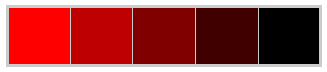

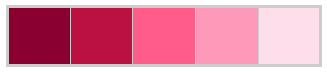

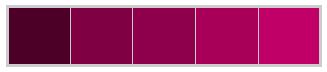

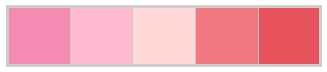

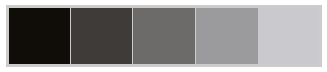

In [113]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)  

In [114]:
strk_df.head().style.background_gradient(cmap='Purples').set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')  

In [115]:
strk_df.dtypes 

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [116]:
strk_df.describe().style.background_gradient(cmap='Purples').set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')  

In [117]:
pp.ProfileReport(strk_df) 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
#description of percent of data object columns
col=strk_df.select_dtypes(include=['object']).columns.tolist()
#create iteration of object columns
for i in col:
    count=strk_df.groupby(['stroke'])[i].value_counts()[1]
    percent=strk_df.groupby(['stroke'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"Patients":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"})
            .highlight_max(props='font-weight:bold; color:Black', axis=0)) 

In [126]:
strk_df.drop(index =strk_df[strk_df['gender']=='Other'].index[0] ,axis=0,inplace=True) 

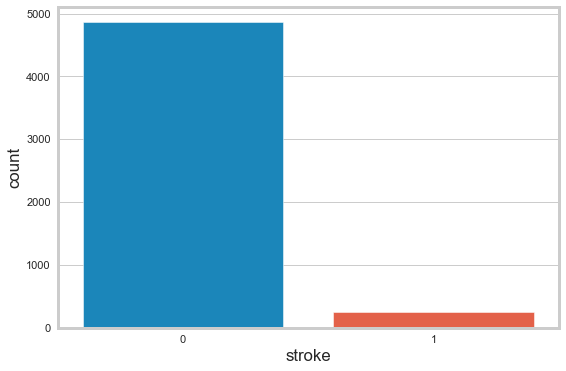

In [127]:
sns.countplot(data=strk_df,x='stroke')
plt.show() 


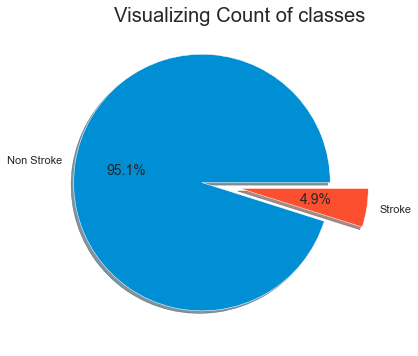

In [128]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(strk_df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show() 

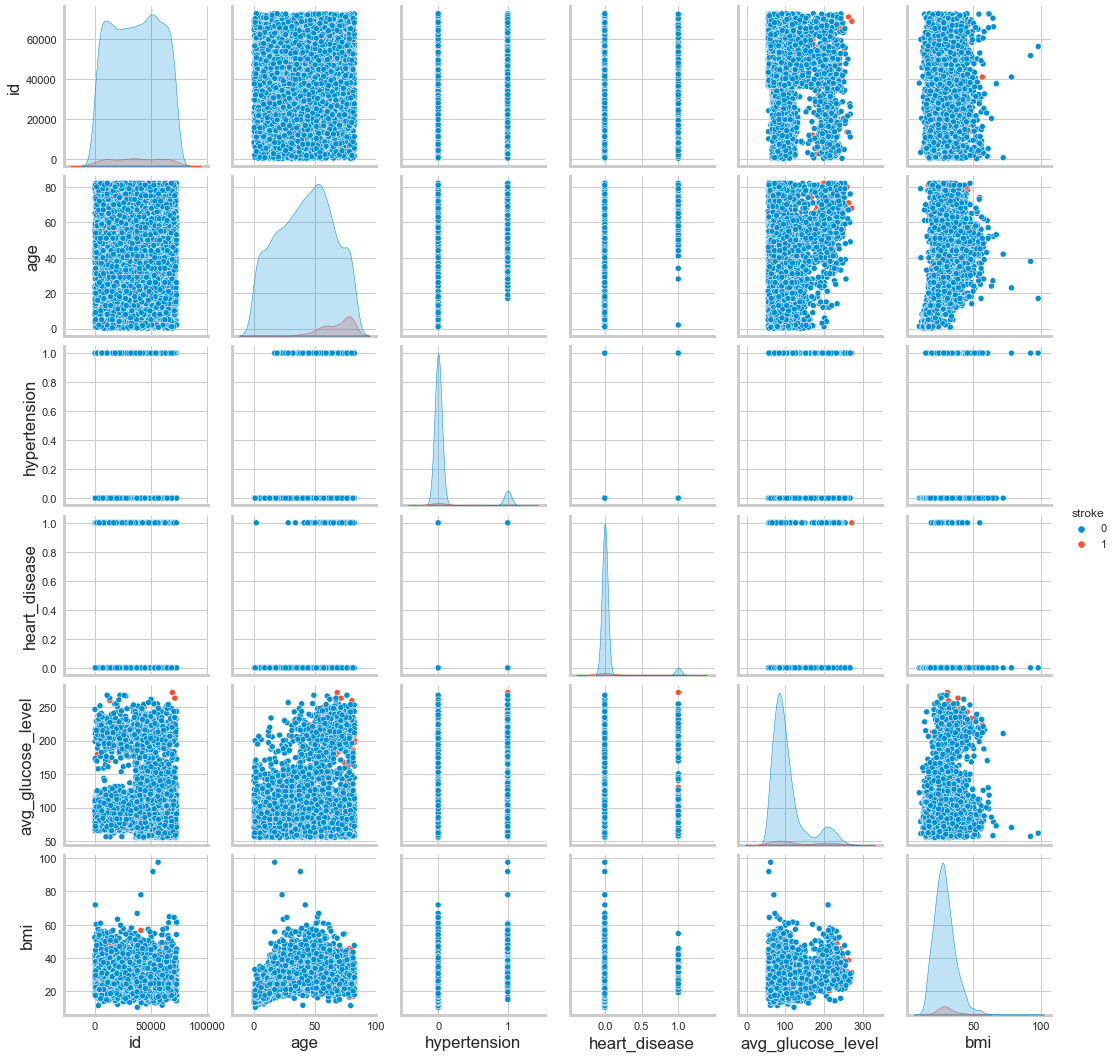

In [129]:
sns.pairplot(data=strk_df,hue='stroke') 

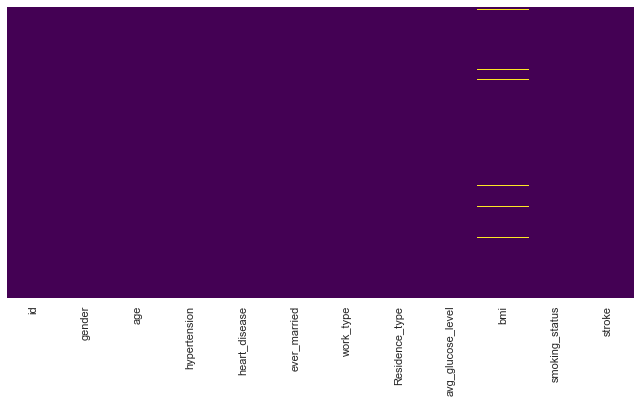

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(yticklabels=False, data=strk_df.isnull(), cbar=False, cmap="viridis")
plt.show() 

In [131]:
strk_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 647.9+ KB


In [132]:
strk_df.gender.unique() 

array(['Male', 'Female'], dtype=object)

In [133]:
strk_df.ever_married.unique() 

array(['Yes', 'No'], dtype=object)

In [134]:
#converting 'ever-married' 'Residence_type' to boolean values
strk_df.replace(to_replace="Yes", value=1, inplace=True)
strk_df.replace(to_replace="No", value=0, inplace=True) 

strk_df.replace(to_replace="Urban", value=1, inplace=True)
strk_df.replace(to_replace="Rural", value=0, inplace=True) 

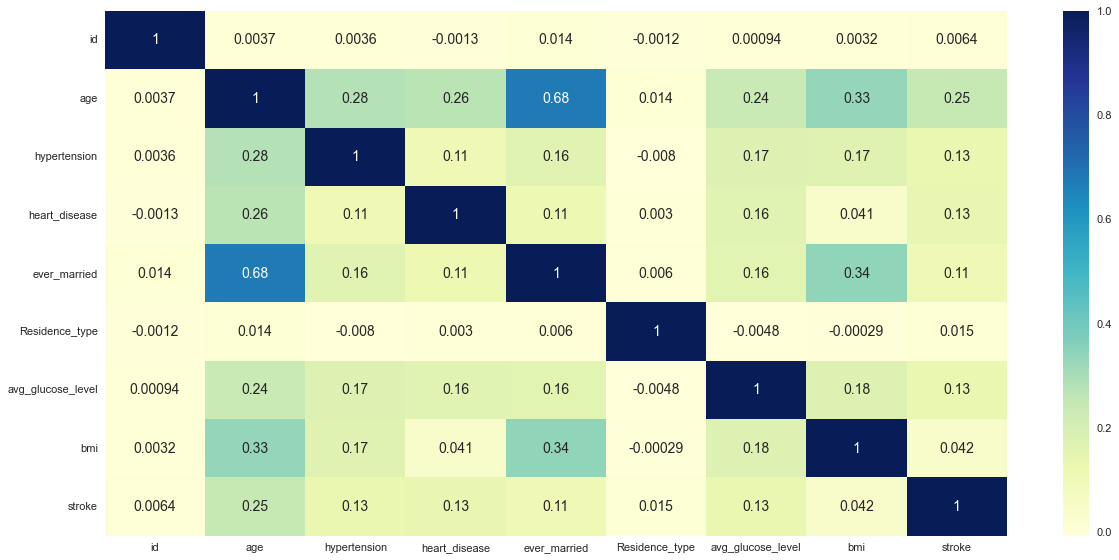

In [135]:
plt.figure(figsize=(18, 9))
sns.heatmap(strk_df.corr(), cmap="YlGnBu", annot=True)
plt.show() 

In [136]:
strk_df.work_type.unique() 

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

Text(0, 0.5, 'Individuals with stroke: Smoking status')

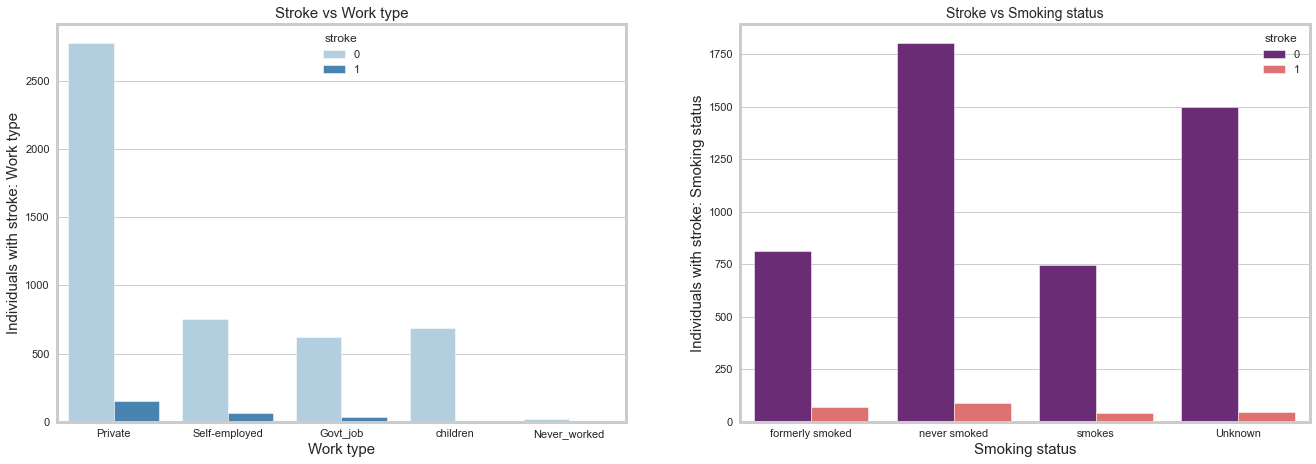

In [137]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = strk_df.work_type, hue = strk_df.stroke, palette="Blues")
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Work type', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = strk_df.smoking_status, hue = strk_df.stroke, palette="magma")
plt.title('Stroke vs Smoking status', fontsize=14)
plt.xlabel('Smoking status', fontsize=15)
plt.ylabel('Individuals with stroke: Smoking status', fontsize=15) 

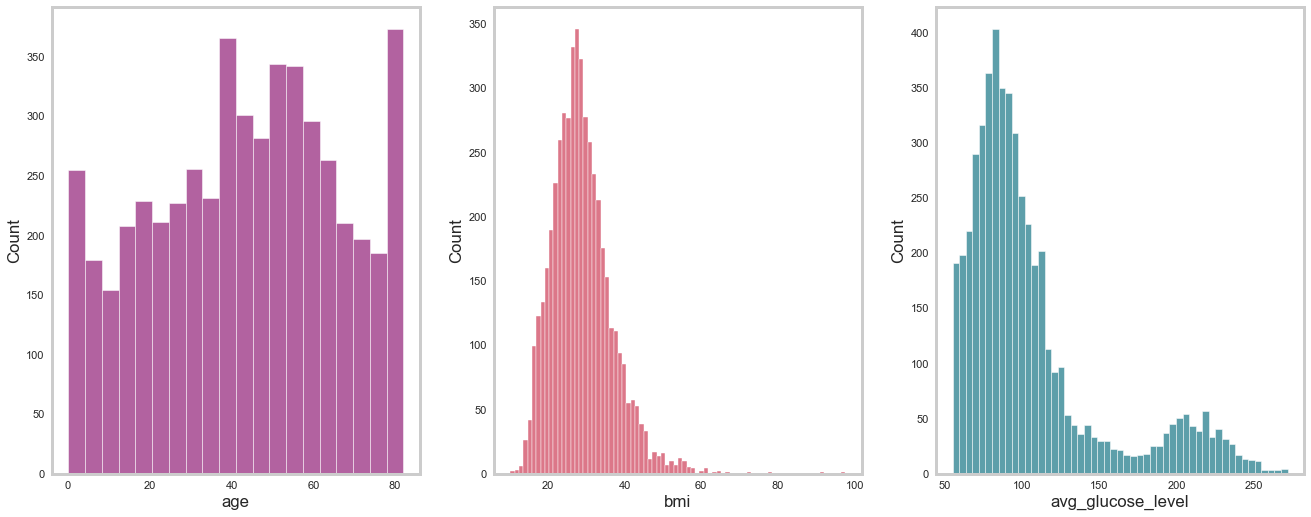

In [138]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
ax1 = sns.histplot(strk_df.age, color=sns.color_palette('magma')[2])
plt.subplot(1, 3, 2)
ax2 = sns.histplot(strk_df.bmi, color=sns.color_palette('flare')[2])
plt.subplot(1, 3, 3)
ax3 = sns.histplot(strk_df.avg_glucose_level, color=sns.color_palette('viridis')[2])
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
plt.show() 

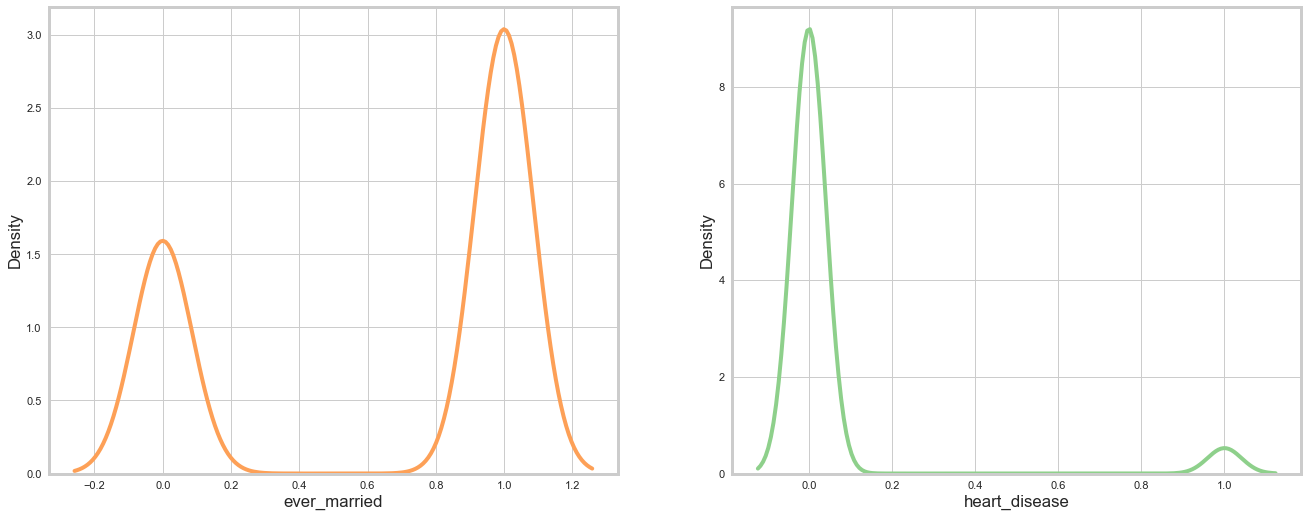

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.kdeplot(strk_df.ever_married, color=sns.color_palette('Oranges')[2])
plt.subplot(1, 2, 2)
sns.kdeplot(strk_df.heart_disease, color=sns.color_palette('Greens')[2])
plt.show() 

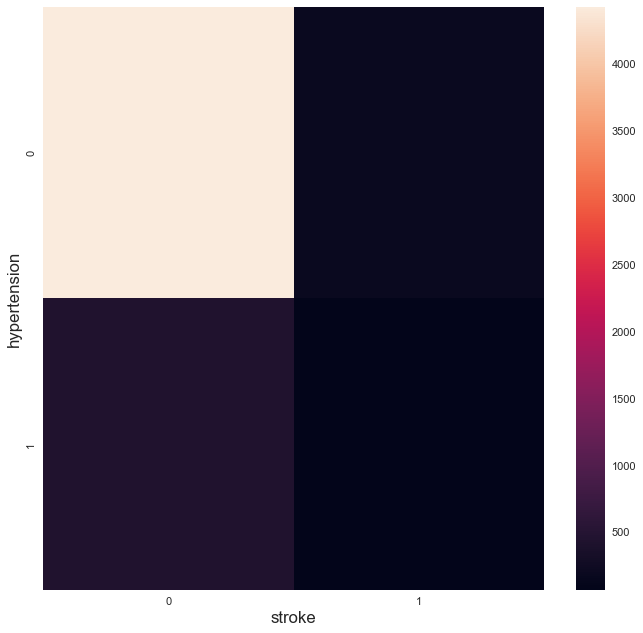

In [140]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(strk_df['hypertension'],strk_df['stroke']))
plt.show() 

Shape of your Data Set loaded: (5110, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


<Figure size 720x360 with 0 Axes>

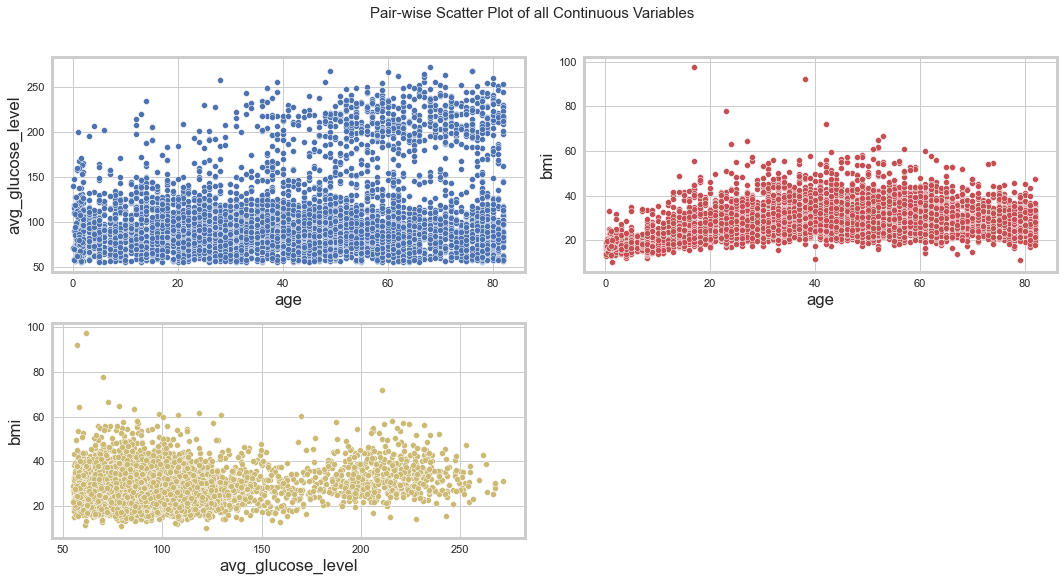

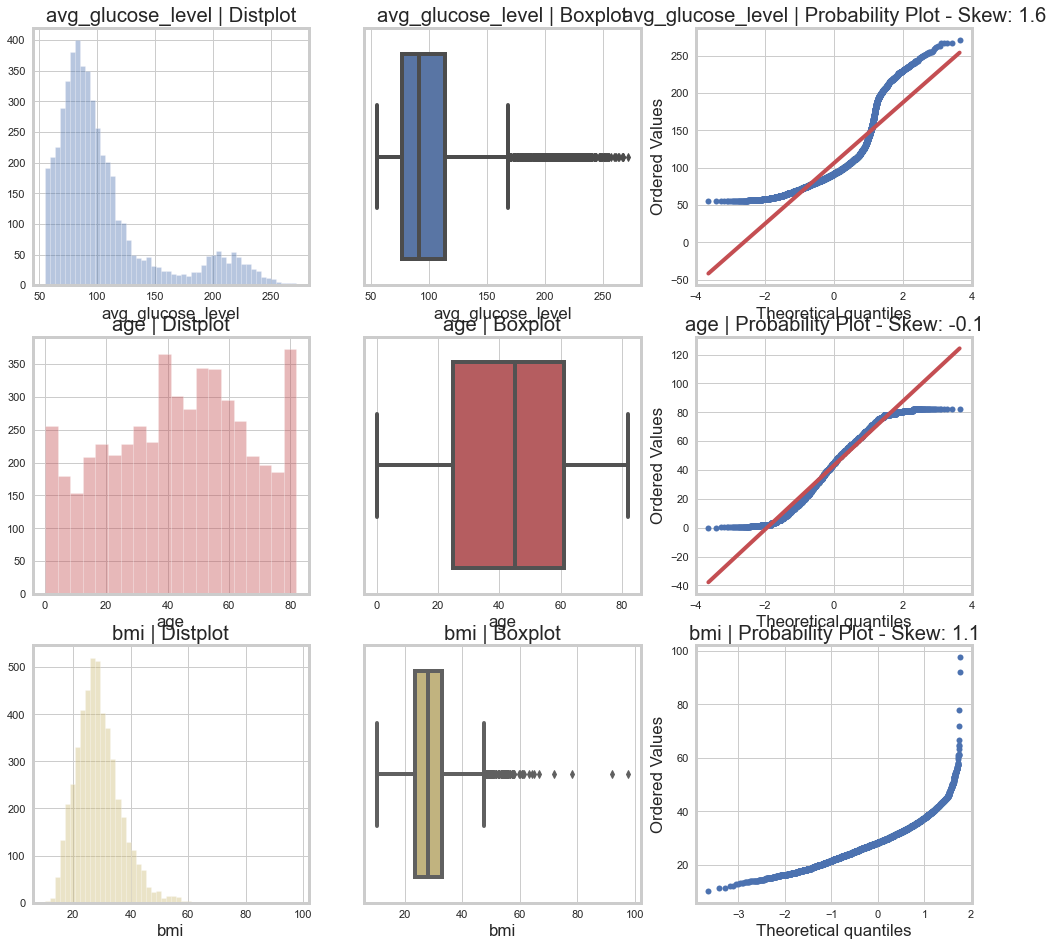

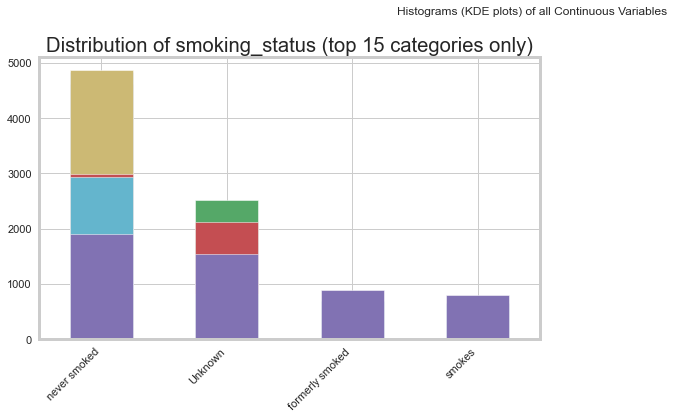

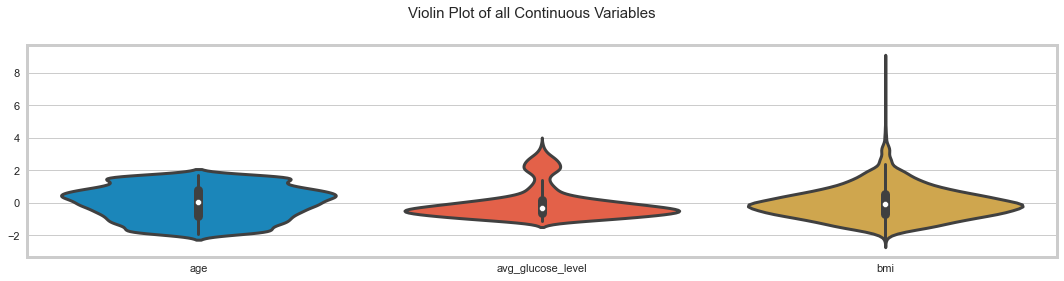

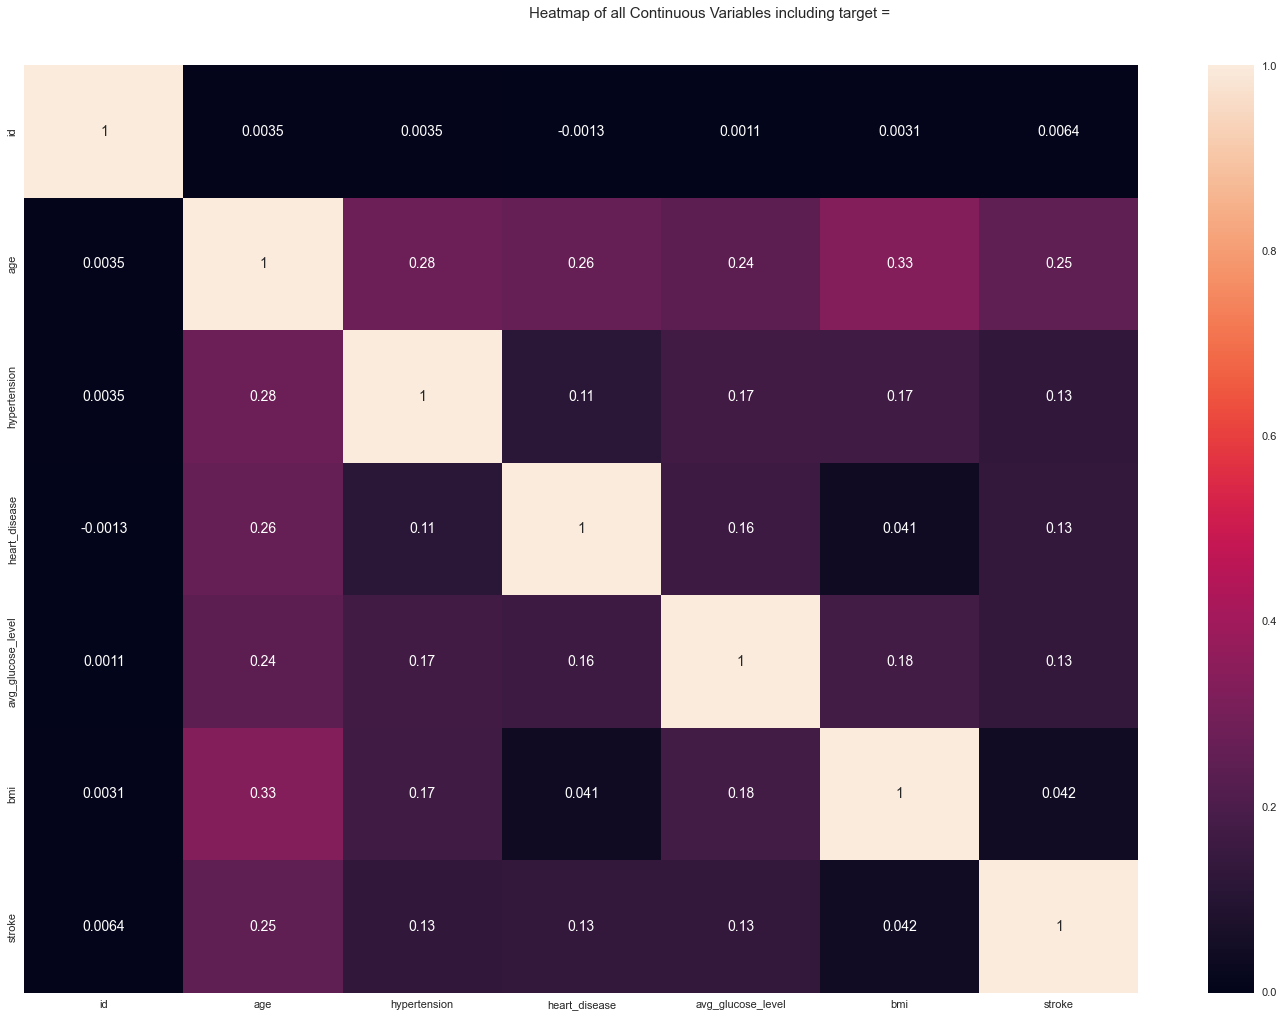

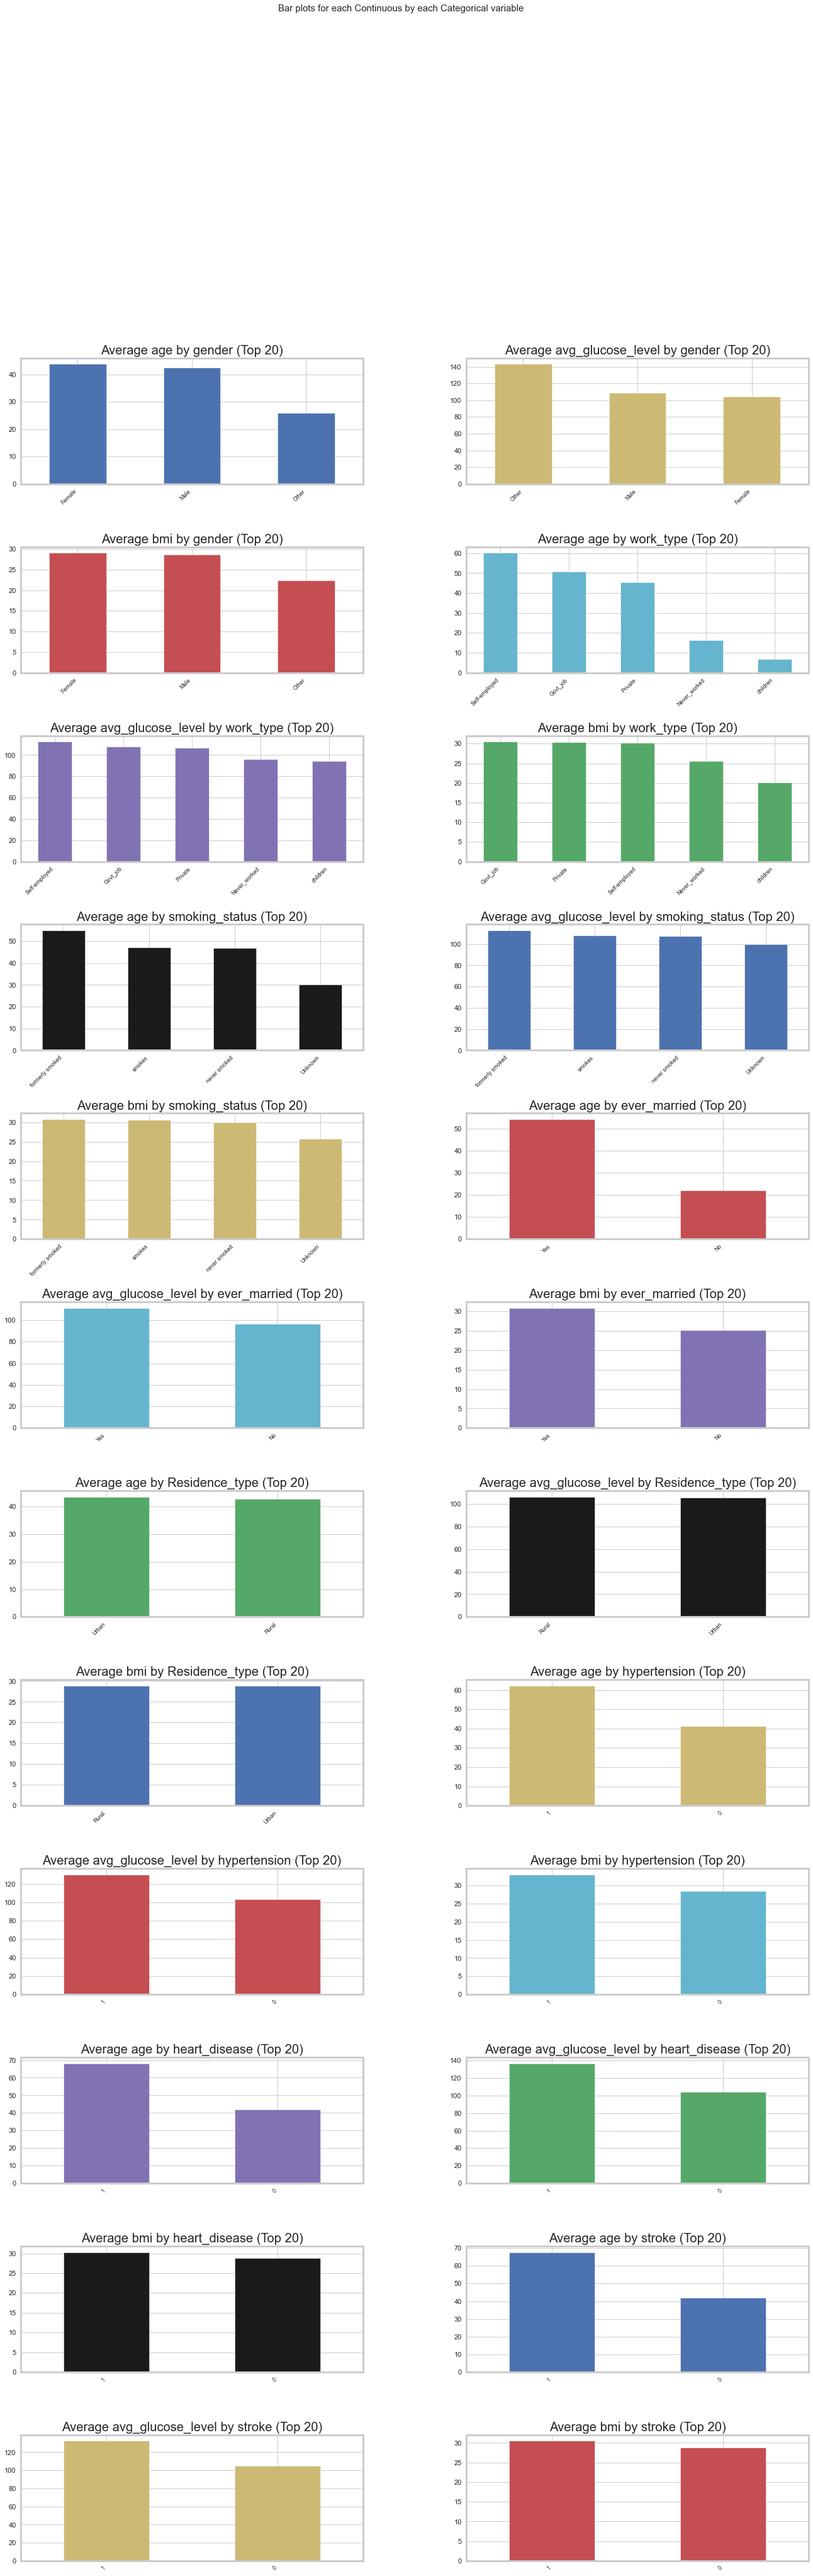

In [141]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz(path) 
plt.show() 

In [142]:
#Imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
strk_df = pd.DataFrame(imputer.fit_transform(strk_df), columns=strk_df.columns, index=strk_df.id)
strk_df = strk_df.reset_index(drop=True)  

In [143]:
strk_df.isnull().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [144]:
#After creating dummy columns with the values of columns of interest
strk_df.head() 

id  gender   age hypertension heart_disease ever_married      work_type  \
0   9046    Male  67.0            0             1            1        Private   
1  51676  Female  61.0            0             0            1  Self-employed   
2  31112    Male  80.0            0             1            1        Private   
3  60182  Female  49.0            0             0            1        Private   
4   1665  Female  79.0            1             0            1  Self-employed   

  Residence_type avg_glucose_level   bmi   smoking_status stroke  
0              1            228.69  36.6  formerly smoked      1  
1              0            202.21  28.7     never smoked      1  
2              0            105.92  32.5     never smoked      1  
3              1            171.23  34.4           smokes      1  
4              0            174.12  24.0     never smoked      1

In [145]:
strk_df = pd.get_dummies(strk_df, columns=['work_type', 'smoking_status', 'gender'])
strk_df.drop(columns=['id'], inplace=True)
strk_df.head()


age hypertension heart_disease ever_married Residence_type  \
0  67.0            0             1            1              1   
1  61.0            0             0            1              0   
2  80.0            0             1            1              0   
3  49.0            0             0            1              1   
4  79.0            1             0            1              0   

  avg_glucose_level   bmi stroke  work_type_Govt_job  work_type_Never_worked  \
0            228.69  36.6      1                   0                       0   
1            202.21  28.7      1                   0                       0   
2            105.92  32.5      1                   0                       0   
3            171.23  34.4      1                   0                       0   
4            174.12  24.0      1                   0                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               1   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  gender_Female  \
0                            0                      0              0   
1                            1                      0              1   
2                            1                      0              0   
3                            0                      1              1   
4                            1                      0              1   

   gender_Male  
0            1  
1            0  
2            1  
3            0  
4            0

In [148]:
yData = strk_df.pop('stroke').to_numpy()
xData = strk_df.to_numpy()

xData = xData.astype(np.float32)
yData = yData.astype(np.float32)
xData.shape, yData.shape

((5109, 18), (5109,))

In [149]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:] 

In [ ]:
#Data is now ready to be implemented on various ML models

In [186]:
# Model Implementation 1- Logistic Regression

In [150]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test) 

In [151]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.') 

.:. Logistic Regression Accuracy: 99.87% .:.


In [152]:
# Model Implementation 2- K-Nearest Neighbour (KNN)

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
KNNAcc = accuracy_score(y_test, y_pred_knn)  


In [166]:
# --- KNN Accuracy ---
print('.:. K-Nearest Neighbour (KNN) Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.') 


.:. K-Nearest Neighbour (KNN) Accuracy: 99.15% .:.


In [167]:
# Model Implementation 3- Support Vector Machine (SVM)

In [169]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)
y_pred_SVM = SVMclassifier.predict(x_test) 


In [171]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.') 

.:. Support Vector Machine Accuracy: 25.64% .:.


In [173]:
# Model Implementation 4- Gaussian Naive Bayes

In [174]:
from sklearn.naive_bayes import GaussianNB
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [175]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.') 

.:. Gaussian Naive Bayes Accuracy: 97.39% .:.


In [176]:
# Model Implementation 5- Decision Tree

In [177]:
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test) 

In [178]:
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.') 

.:. Decision Tree Accuracy: 99.80% .:.


In [179]:
# Model Implementation 6-Random Forest

In [180]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test) 

In [181]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.') 

.:. Random Forest Accuracy: 100.00% .:.


In [182]:
# Model Implementation 7- Gradient Boosting

In [184]:
from sklearn.ensemble import GradientBoostingClassifier 
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test) 

In [185]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.') 

.:. Gradient Boosting Accuracy: 100.00% .:.
